In [1]:
import numpy as np
import pandas as pd
import string
import calendar
import re
import math
import sympy
import matplotlib.pyplot as plt

from fractions import Fraction
from scipy import stats


print(f"numpy version is {np.__version__}")
print(f"pandas version is {pd.__version__}")

numpy version is 1.20.3
pandas version is 1.3.1


In [11]:
a, b = np.array([]), np.array([])
for i in range(0, 51):
    print('(', i,',', stats.binom.pmf(i, 50, 0.7).round(4), ')', end = ' ')

( 0 , 0.0 ) ( 1 , 0.0 ) ( 2 , 0.0 ) ( 3 , 0.0 ) ( 4 , 0.0 ) ( 5 , 0.0 ) ( 6 , 0.0 ) ( 7 , 0.0 ) ( 8 , 0.0 ) ( 9 , 0.0 ) ( 10 , 0.0 ) ( 11 , 0.0 ) ( 12 , 0.0 ) ( 13 , 0.0 ) ( 14 , 0.0 ) ( 15 , 0.0 ) ( 16 , 0.0 ) ( 17 , 0.0 ) ( 18 , 0.0 ) ( 19 , 0.0 ) ( 20 , 0.0 ) ( 21 , 0.0 ) ( 22 , 0.0001 ) ( 23 , 0.0002 ) ( 24 , 0.0006 ) ( 25 , 0.0014 ) ( 26 , 0.0032 ) ( 27 , 0.0067 ) ( 28 , 0.0128 ) ( 29 , 0.0227 ) ( 30 , 0.037 ) ( 31 , 0.0558 ) ( 32 , 0.0772 ) ( 33 , 0.0983 ) ( 34 , 0.1147 ) ( 35 , 0.1223 ) ( 36 , 0.1189 ) ( 37 , 0.105 ) ( 38 , 0.0838 ) ( 39 , 0.0602 ) ( 40 , 0.0386 ) ( 41 , 0.022 ) ( 42 , 0.011 ) ( 43 , 0.0048 ) ( 44 , 0.0018 ) ( 45 , 0.0006 ) ( 46 , 0.0001 ) ( 47 , 0.0 ) ( 48 , 0.0 ) ( 49 , 0.0 ) ( 50 , 0.0 ) 

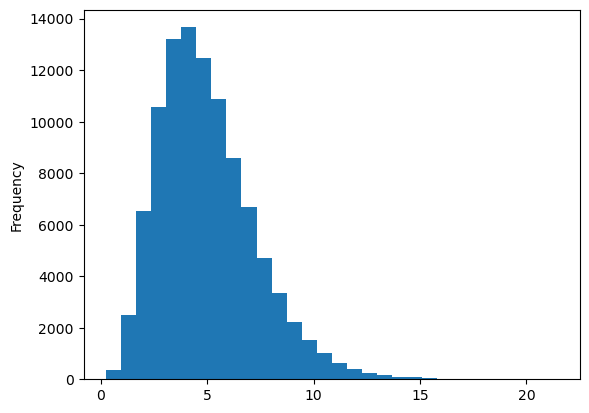

In [57]:


dfc = pd.DataFrame(np.transpose([stats.expon.rvs(size=100000), stats.expon.rvs(size=100000), stats.expon.rvs(size=100000), stats.expon.rvs(size=100000), stats.expon.rvs(size=100000)]))
s1 = dfc.sum(axis = 1)
s1.plot.hist(bins = 30)
plt.show()

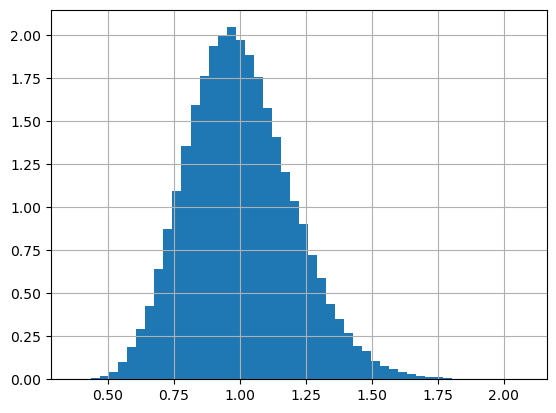

In [158]:
summed = np.zeros(100000)
n = 25
for i in range(n):
    current_rvs = stats.expon.rvs(size = 100000)
    summed = summed + current_rvs
    
s2 = pd.Series(summed/n)
h2 = s2.hist(bins = 50, density = True)
plt.show()

In [159]:
(n1, n2) = np.histogram(summed/n, bins = 50, density = True)
print(*sorted(set(zip(n2[:-1].round(4), n1.round(4)))))

(0.3687, 0.0012) (0.4029, 0.0041) (0.4371, 0.0091) (0.4712, 0.0219) (0.5054, 0.0448) (0.5396, 0.1021) (0.5738, 0.1884) (0.6079, 0.2929) (0.6421, 0.4258) (0.6763, 0.6417) (0.7105, 0.8726) (0.7446, 1.0961) (0.7788, 1.3592) (0.813, 1.595) (0.8472, 1.7651) (0.8813, 1.938) (0.9155, 1.9959) (0.9497, 2.0477) (0.9839, 1.9737) (1.018, 1.8871) (1.0522, 1.7569) (1.0864, 1.5763) (1.1206, 1.4089) (1.1547, 1.2044) (1.1889, 1.04) (1.2231, 0.903) (1.2573, 0.7251) (1.2914, 0.5879) (1.3256, 0.4386) (1.3598, 0.3485) (1.394, 0.2718) (1.4281, 0.1955) (1.4623, 0.1639) (1.4965, 0.108) (1.5307, 0.0758) (1.5648, 0.06) (1.599, 0.0418) (1.6332, 0.0296) (1.6674, 0.0199) (1.7015, 0.0138) (1.7357, 0.0132) (1.7699, 0.005) (1.804, 0.0029) (1.8382, 0.0035) (1.8724, 0.0015) (1.9066, 0.0015) (1.9407, 0.0012) (1.9749, 0.0003) (2.0091, 0.0) (2.0433, 0.0006)


In [210]:
p1 = [0.2, 0.3, 0, 0.5]
smat1 = pd.DataFrame(np.outer(p1, p1))
print(smat1.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &     0 &     1 &    2 &     3 \\
\midrule
0 &  0.04 &  0.06 &  0.0 &  0.10 \\
1 &  0.06 &  0.09 &  0.0 &  0.15 \\
2 &  0.00 &  0.00 &  0.0 &  0.00 \\
3 &  0.10 &  0.15 &  0.0 &  0.25 \\
\bottomrule
\end{tabular}



In [175]:
x1 = np.arange(0, 3.5, 0.5)
y1 = np.array([4, 12, 9, 20, 30, 0, 25])*0.01
print((x1*x1*y1).sum())

4.02


In [180]:
x2 = np.arange(0, 10/3, 1/3)
y2 = np.array([8, 36, 54, 87, 180, 135, 150, 225, 0, 125])*0.001
print((x1*y1).sum())

1.8


In [191]:
x3 = np.arange(1, 7)
y3 = 1/6 * np.ones(6)
print((x3*x3*y3).sum())
Fraction(91/6 - 49/4).limit_denominator()

15.166666666666666


Fraction(35, 12)

In [193]:
stats.norm.cdf((40.5-35)/math.sqrt(350/12)) - stats.norm.cdf((29.5-35)/math.sqrt(350/12))

0.6915131000063912

In [194]:
(40.5-35)/math.sqrt(350/12)

1.0184021097498066

In [195]:
1 - stats.norm.cdf(0.5 / math.sqrt(1/12))

0.041632258331775196

In [211]:
k = 100000
1 - stats.norm.cdf((k/19)/math.sqrt(k*630/19))

0.0019239642391333245

In [220]:
stats.norm.cdf((math.sqrt(12)*(52/12 - 5))/1.5)

0.06182885520141667

In [9]:
stats.norm.cdf(8/3) - stats.norm.cdf(-8/3)

0.9923392388648204

In [7]:
stats.norm.cdf(-90 / (math.sqrt(35*140/12)))

4.217301385212216e-06

In [6]:
-90 / (math.sqrt(35*140/12))

-4.453844933748542

In [10]:
Fraction(1/25 + 1/64).limit_denominator()

Fraction(89, 1600)

In [13]:
stats.norm.cdf(-9.5/6)

0.05667275460976292

In [26]:
p14 = np.array([[0, 0.6, 0.7, 0.75], [0, 0, 0.6, 0.7], [0, 0, 0, 0.5], [0, 0, 0, 0]])
for i in range(np.shape(p14)[0]):
    for j in range(i):
        p14[i][j] = 1 - p14[j][i]
        
p14

array([[0.  , 0.6 , 0.7 , 0.75],
       [0.4 , 0.  , 0.6 , 0.7 ],
       [0.3 , 0.4 , 0.  , 0.5 ],
       [0.25, 0.3 , 0.5 , 0.  ]])

In [36]:
df14 = pd.DataFrame(p14, columns = ['A', 'B', 'C', 'D'], index = ['A', 'B', 'C', 'D'])
print(df14.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &     A &    B &    C &     D \\
\midrule
A &  0.00 &  0.6 &  0.7 &  0.75 \\
B &  0.40 &  0.0 &  0.6 &  0.70 \\
C &  0.30 &  0.4 &  0.0 &  0.50 \\
D &  0.25 &  0.3 &  0.5 &  0.00 \\
\bottomrule
\end{tabular}



In [48]:
1 -stats.norm.cdf((39.5-35.6) / math.sqrt(13.88))


0.14759249050332934

In [49]:
stats.poisson.cdf(116, 100)

0.9477845107370083

In [54]:
stats.norm.cdf(0.5/3)

0.5661838326109037

In [53]:
stats.poisson.cdf(10, 10)

0.5830397501929852

In [57]:
stats.chi2.cdf(4.6, 5) - stats.chi2.cdf(3.4, 5)

0.17195364898846427

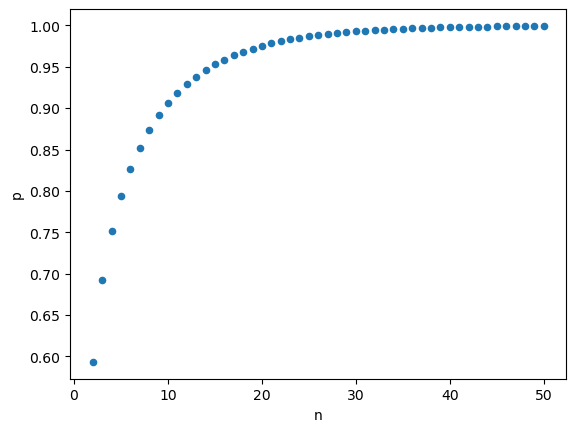

In [94]:
a = np.array([0, 0])
for i in range(2, 51):
    b = np.array([i, stats.chi2.cdf((i-1)*1.8, i)])
    a = np.vstack((a, b))
df19 = pd.DataFrame(np.round(a[1:], 4), columns = ['n', 'p'])
df19.plot.scatter(x = 'n', y = 'p')
plt.show()

In [95]:
m = list(zip(df19['n'], df19['p']))
print(*m)

(2.0, 0.5934) (3.0, 0.692) (4.0, 0.7513) (5.0, 0.7938) (6.0, 0.8264) (7.0, 0.8524) (8.0, 0.8736) (9.0, 0.8912) (10.0, 0.906) (11.0, 0.9184) (12.0, 0.929) (13.0, 0.9381) (14.0, 0.9459) (15.0, 0.9527) (16.0, 0.9585) (17.0, 0.9636) (18.0, 0.968) (19.0, 0.9718) (20.0, 0.9752) (21.0, 0.9781) (22.0, 0.9807) (23.0, 0.983) (24.0, 0.985) (25.0, 0.9867) (26.0, 0.9882) (27.0, 0.9896) (28.0, 0.9908) (29.0, 0.9918) (30.0, 0.9928) (31.0, 0.9936) (32.0, 0.9943) (33.0, 0.9949) (34.0, 0.9955) (35.0, 0.996) (36.0, 0.9965) (37.0, 0.9969) (38.0, 0.9972) (39.0, 0.9975) (40.0, 0.9978) (41.0, 0.998) (42.0, 0.9982) (43.0, 0.9984) (44.0, 0.9986) (45.0, 0.9988) (46.0, 0.9989) (47.0, 0.999) (48.0, 0.9991) (49.0, 0.9992) (50.0, 0.9993)


In [98]:
1  - stats.f.cdf(2, 4, 9)

0.1781960588300635

In [101]:
stats.binom.cdf(14, 100, 0.12) - stats.binom.cdf(10, 100, 0.12)

0.4503159364180855

In [106]:
stats.norm.cdf(2.5/math.sqrt(12*0.88)) - stats.norm.cdf(-2.5/math.sqrt(12*0.88))

0.5582977122093997

In [124]:
n = 10000
1 - stats.norm.cdf((0.5*n - 0.5 - 0.52*n) / (math.sqrt(n*0.52*0.48)))

0.9999700509455325

In [145]:
stats.norm.cdf((50.5-64.2) / (math.sqrt(300*0.214*0.786)))

0.026890374993468753

In [143]:
1-0.214

0.786

In [146]:
300*(0.42-0.454)

-10.20000000000001

In [149]:
300*0.42 * (1-0.42) + 300*0.454 * (1-0.454)

147.44520000000003

In [168]:
stats.norm.pdf((-5*0.105) / (math.sqrt(5*0.105*(1-0.105))))

0.29753166502842265

In [162]:
149*(1-0.149)

126.79899999999999

In [158]:
458*(1-0.458)

248.23600000000002

In [164]:
1000*0.165*(1-0.165) + 1000*0.134*(1-0.134) 

253.81900000000002

In [167]:
math.pow(1-0.201, 5)

0.3256371136039989

In [174]:
1 - stats.norm.cdf(14*math.sqrt(12)/32)

0.06481729043950646

In [186]:
stats.norm.cdf(1)

0.8413447460685429

In [188]:
stats.norm.ppf(0.05)

-1.6448536269514729

In [192]:
np.roots([-100, 1.6448*30, 2000])

array([ 4.72565634, -4.23221634])

In [197]:
print(1 - stats.norm.cdf((2000-100*23)/(30*math.sqrt(23))))

0.9814718907179405


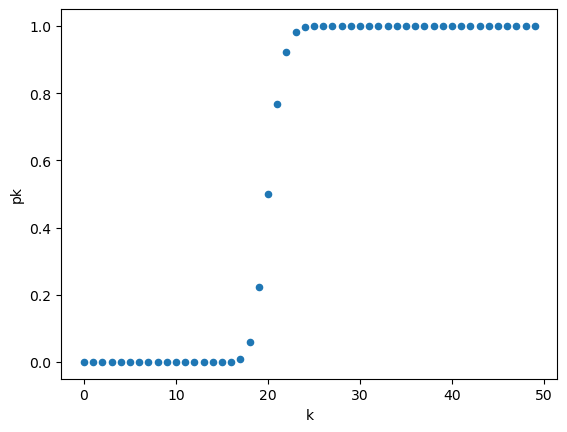

(0.0, 0.0) (1.0, 0.0) (2.0, 0.0) (3.0, 0.0) (4.0, 0.0) (5.0, 0.0) (6.0, 0.0) (7.0, 0.0) (8.0, 0.0) (9.0, 0.0) (10.0, 0.0) (11.0, 0.0) (12.0, 6.8833827526759706e-15) (13.0, 4.851663515381688e-11) (14.0, 4.5152443450824364e-08) (15.0, 8.413074170987578e-06) (16.0, 0.0004290603331967846) (17.0, 0.007646685515099505) (18.0, 0.058050871990274366) (19.0, 0.2222194112520176) (20.0, 0.5) (21.0, 0.7665073693266079) (22.0, 0.922390755157658) (23.0, 0.9814718907179405) (24.0, 0.9967522068714105) (25.0, 0.9995709396668032) (26.0, 0.999956150288122) (27.0, 0.9999964472261701) (28.0, 0.9999997666572595) (29.0, 0.9999999873257626) (30.0, 0.9999999994204671) (31.0, 0.9999999999773364) (32.0, 0.9999999999992313) (33.0, 0.9999999999999771) (34.0, 0.9999999999999994) (35.0, 1.0) (36.0, 1.0) (37.0, 1.0) (38.0, 1.0) (39.0, 1.0) (40.0, 1.0) (41.0, 1.0) (42.0, 1.0) (43.0, 1.0) (44.0, 1.0) (45.0, 1.0) (46.0, 1.0) (47.0, 1.0) (48.0, 1.0) (49.0, 1.0)


In [201]:
a = np.array([0, 0])
for k in range(1, 50):
    z = 1 - stats.norm.cdf((2000-100*k)/(30*math.sqrt(k)))
    a = np.vstack((a, [k, z]))
df30 = pd.DataFrame(a, columns = ['k', 'pk'])
df30.plot.scatter(x = 'k', y = 'pk')
plt.show()

m1 = list(zip(df30['k'], df30['pk']))
print(*m1)